In [840]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pprint as pprint
import hvplot.pandas
import geopandas

In [841]:
# Function to save figures with numeric-encoded filenames
figure_count = 0

def save_figure(fig_count, path, filename):
    fig_count = fig_count + 1
    figure_code = f"d{fig_count:02d}_"
    full_path = f"{path}/{figure_code}{filename}"
    print(f"Saving to: {full_path}")
    plt.savefig(full_path)
    return fig_count

In [842]:
# Read home value data

data_path_home_value = "Data/home_value_interpolated.csv"
home_value_df = pd.read_csv(data_path_home_value, index_col=0)
home_value_df.head()

,Year,Month,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Interpolated
Date,,,,,,,,,,,,,,,,,,,,,
2004-01,2004,1,161415.797093,112468.897763,187235.313336,166981.743111,101330.145359,320965.660495,222891.848203,240366.466568,...,122685.992092,120843.533394,180548.766033,159287.338362,177558.177299,212860.778161,86900.603167,150926.440573,154013.426255,NaN
2004-02,2004,2,162463.870016,112725.088423,187841.549097,167847.418906,101783.232071,325732.847350,223182.101684,242095.673819,...,123007.298345,121661.051633,180839.208311,160645.635537,179308.464022,214128.636011,87419.094513,151705.824485,154493.152088,NaN
2004-03,2004,3,163620.161222,113012.039266,188271.790840,168900.513316,102304.179582,331170.356031,223520.345262,243749.324603,...,123363.249017,122955.182386,181171.778189,162105.970945,181345.555866,215461.768858,88034.036663,152507.819145,155126.857142,NaN
2004-04,2004,4,164912.797589,113305.182222,189382.536002,170180.251404,102880.788798,337412.489527,224019.582683,245757.604398,...,123763.276144,124239.434257,181569.731315,163691.500174,183784.251765,217005.863589,88581.017025,153457.607735,155979.327633,NaN
2004-05,2004,5,166368.365614,113666.681304,190588.147633,171738.808920,103421.568193,344599.782061,224670.441514,248250.261007,...,124167.724328,125300.686962,181787.254249,165682.582390,186704.735618,218988.123794,89089.913281,154662.247862,157153.052502,NaN


In [843]:
# Read median income data

data_path_median_income = "Data/median_income_formatted.csv"
median_income_df = pd.read_csv(data_path_median_income, index_col=0)
median_income_df.head()

,Year,Month,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2004-01,2004,1,44330.0,36630.0,55060.0,43850.0,34980.0,49220.0,50890.0,55100.0,...,41110.0,38070.0,41400.0,50870.0,47330.0,51140.0,49920.0,33370.0,45730.0,45400.0
2005-01,2005,1,46330.0,37150.0,55890.0,45250.0,36660.0,51760.0,50450.0,56840.0,...,43150.0,39410.0,41420.0,54810.0,50700.0,51910.0,50650.0,36450.0,44650.0,44720.0
2006-01,2006,1,48200.0,37950.0,56420.0,46660.0,37060.0,55320.0,55700.0,62400.0,...,45430.0,40690.0,43310.0,54630.0,51980.0,57120.0,54720.0,38420.0,51690.0,47040.0
2007-01,2007,1,50230.0,42210.0,62990.0,47220.0,40800.0,55730.0,61140.0,64140.0,...,46420.0,41200.0,46050.0,53530.0,47390.0,59160.0,58080.0,42090.0,51280.0,48740.0
2008-01,2008,1,50300.0,44480.0,63990.0,46910.0,39590.0,57010.0,60940.0,64680.0,...,51600.0,39700.0,46490.0,62540.0,50710.0,61990.0,56630.0,37990.0,51200.0,53340.0


In [844]:
# Read state data
data_path_states = "Data/states.csv"
states_df = pd.read_csv(data_path_states, index_col=0)
states_df.head()

,Code,Lat,Lon
State,,,
Alabama,AL,32.806671,-86.791130
Alaska,AK,61.370716,-152.404419
Arizona,AZ,33.729759,-111.431221
Arkansas,AR,34.969704,-92.373123
California,CA,36.116203,-119.681564


In [845]:
# List home_value_df columns, numbered for reference
hv_list = home_value_df.columns.to_list()
hv_colnum = range(0, len(hv_list))
hv_column_pair = pd.DataFrame(zip(hv_colnum, hv_list))
print(hv_column_pair[1])


0                     Year
1                    Month
2            United States
3                  Alabama
4                   Alaska
5                  Arizona
6                 Arkansas
7               California
8                 Colorado
9              Connecticut
10                Delaware
11    District of Columbia
12                 Florida
13                 Georgia
14                  Hawaii
15                   Idaho
16                Illinois
17                 Indiana
18                    Iowa
19                  Kansas
20                Kentucky
21               Louisiana
22                   Maine
23                Maryland
24           Massachusetts
25                Michigan
26               Minnesota
27             Mississippi
28                Missouri
29                 Montana
30                Nebraska
31                  Nevada
32           New Hampshire
33              New Jersey
34              New Mexico
35                New York
36          North Carolina
3

In [846]:
# List median_income_df columns, numbered for reference
inc_list = median_income_df.columns.to_list()
inc_colnum = range(0, len(inc_list))
inc_column_pair = pd.DataFrame(zip(inc_colnum, inc_list))
print(inc_column_pair[1])


0                     Year
1                    Month
2            United States
3                  Alabama
4                   Alaska
5                  Arizona
6                 Arkansas
7               California
8                 Colorado
9              Connecticut
10                Delaware
11    District of Columbia
12                 Florida
13                 Georgia
14                  Hawaii
15                   Idaho
16                Illinois
17                 Indiana
18                    Iowa
19                  Kansas
20                Kentucky
21               Louisiana
22                   Maine
23                Maryland
24           Massachusetts
25                Michigan
26               Minnesota
27             Mississippi
28                Missouri
29                 Montana
30                Nebraska
31                  Nevada
32           New Hampshire
33              New Jersey
34              New Mexico
35                New York
36          North Carolina
3

In [847]:
# Variables to define to start and end columns for easy reference
start_column = hv_column_pair[hv_column_pair == 'Alabama'].first_valid_index()
end_column = hv_column_pair[hv_column_pair == 'Wyoming'].first_valid_index() + 1
print(f"Start Column = {start_column}\nEnd Column = {end_column}")

Start Column = 3
End Column = 54


Saving to: Images/d01_Home_Values_Income_2004-2023.png


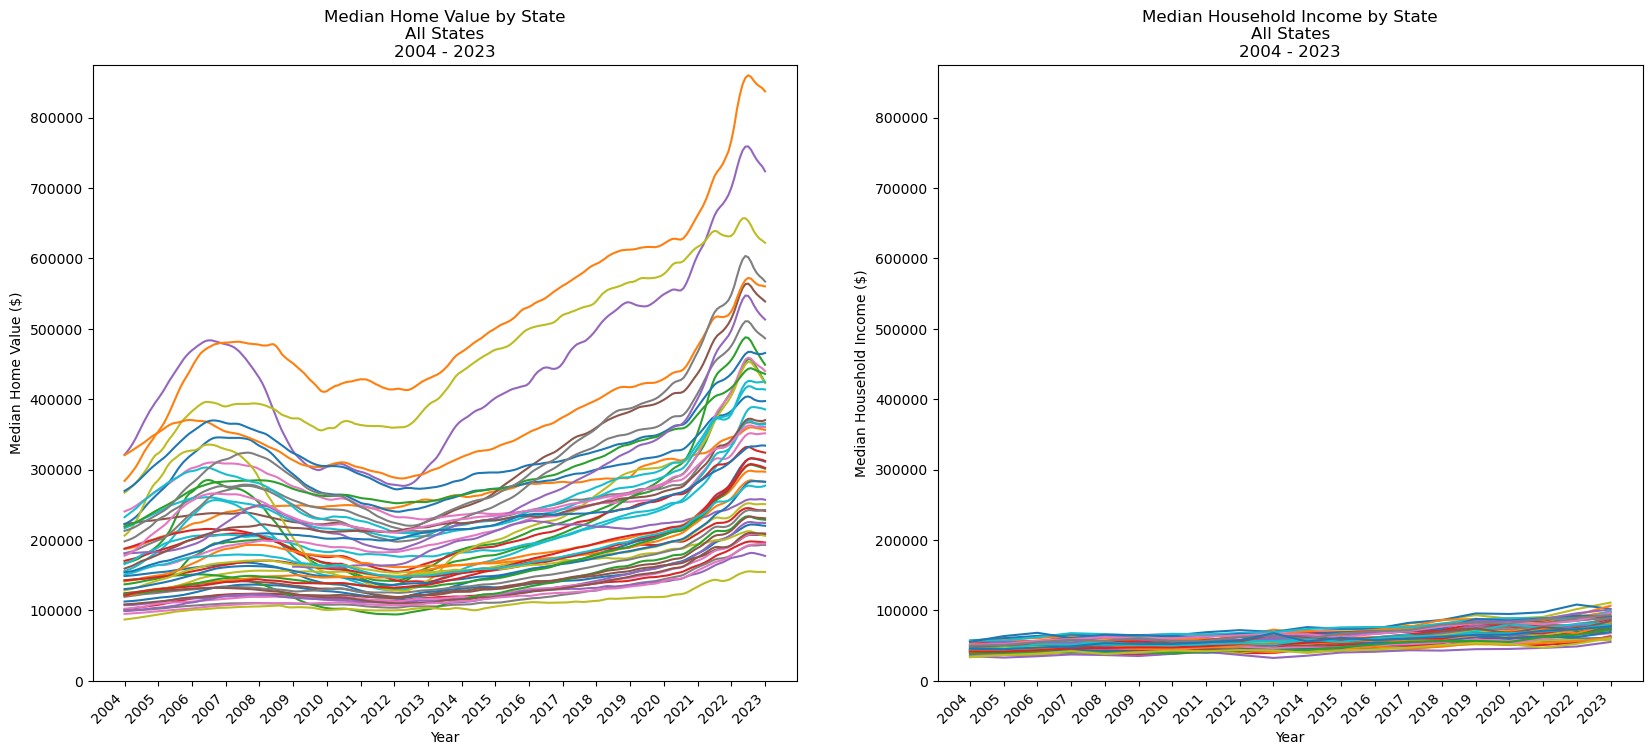

In [848]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plt.plot(home_value_df.iloc[:,start_column:end_column])

fig_xticks = range(0, len(home_value_df), 12)
fig_labels = home_value_df['Year'][::12]
plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
plt.title(f"Median Home Value by State\nAll States\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
plt.xlabel("Year")
plt.ylabel("Median Home Value ($)")
plt.ylim(0, 875000)

plt.subplot(1, 2, 2)
plt.plot(median_income_df.iloc[:,start_column:end_column])

fig_xticks = range(0, len(median_income_df), 1)
fig_labels = median_income_df['Year'][::1]
plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
plt.title(f"Median Household Income by State\nAll States\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
plt.xlabel("Year")
plt.ylabel("Median Household Income ($)")
plt.ylim(0, 875000)

figure_count = save_figure(figure_count, "Images","Home_Values_Income_2004-2023.png")
plt.show();

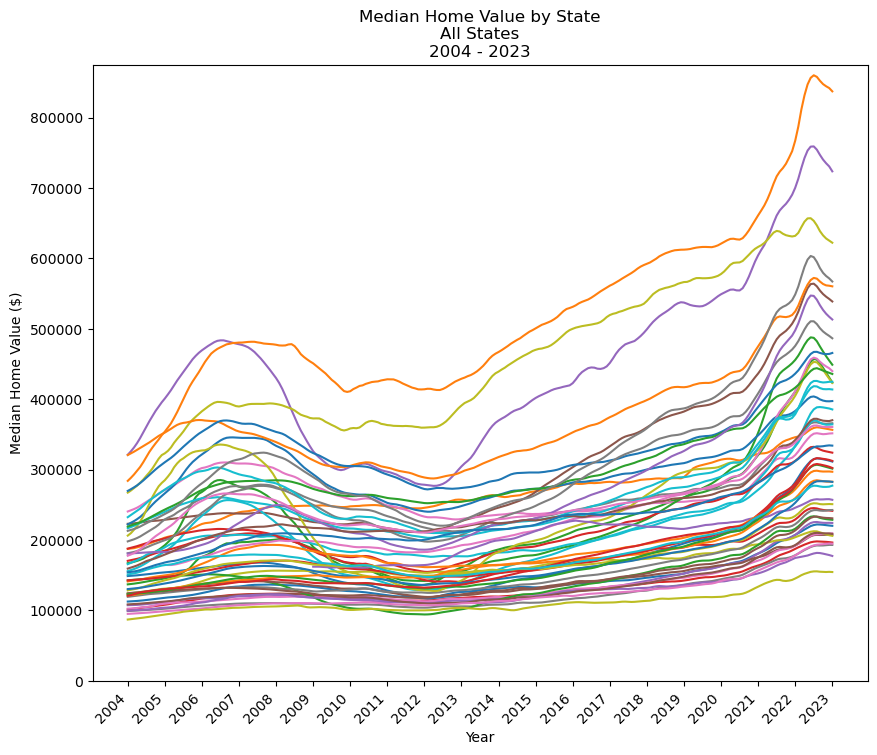

In [849]:
plt.figure(figsize=(10,8))
plt.plot(home_value_df.iloc[:,start_column:end_column])

fig_xticks = range(0, len(home_value_df), 12)
fig_labels = home_value_df['Year'][::12]
plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
plt.title(f"Median Home Value by State\nAll States\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
plt.xlabel("Year")
plt.ylabel("Median Home Value ($)")
plt.ylim(0, 875000)

#figure_count = save_figure(figure_count, "Images","Home_Values_2004-2023.png")
plt.show();

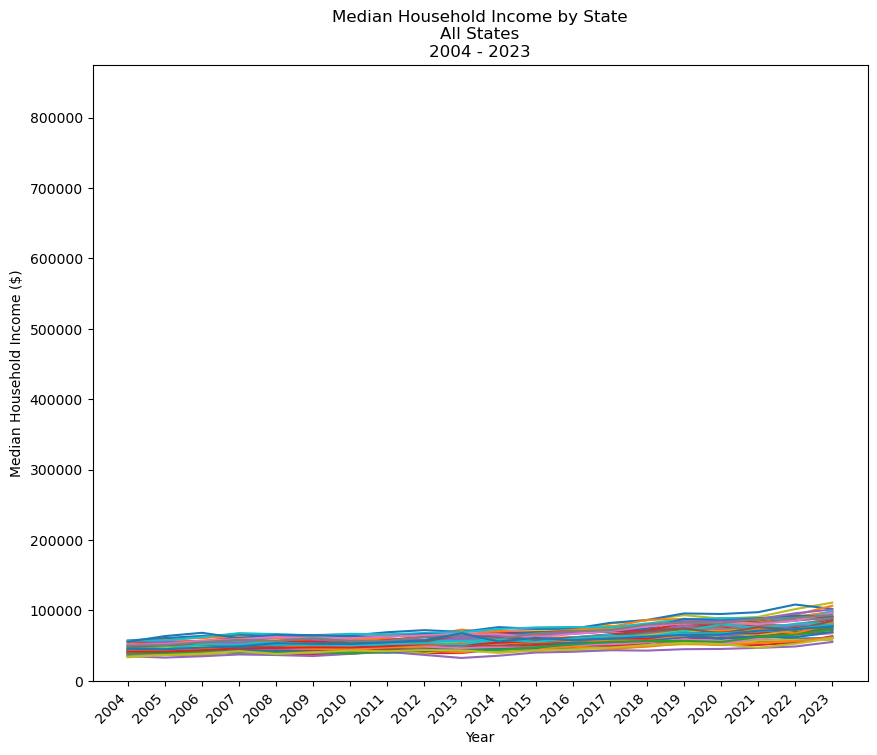

In [850]:
plt.figure(figsize=(10,8))
plt.plot(median_income_df.iloc[:,start_column:end_column])

fig_xticks = range(0, len(median_income_df), 1)
fig_labels = median_income_df['Year'][::1]
plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
plt.title(f"Median Household Income by State\nAll States\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
plt.xlabel("Year")
plt.ylabel("Median Household Income ($)")
plt.ylim(0, 875000)

#figure_count = save_figure(figure_count, "Images","Median_Income_2004-2023.png")
plt.show();

In [851]:
# Calculate the means of median home value over the time range
median_home_value_means_df = home_value_df.iloc[:,start_column:end_column].mean()

# Get the top and bottom 5
median_home_value_means_top_5_df = median_home_value_means_df.sort_values(ascending=False)[0:5]
median_home_value_means_top_5_list = median_home_value_means_top_5_df.index
print(median_home_value_means_top_5_list)

median_home_value_means_bottom_5_df = median_home_value_means_df.sort_values(ascending=True)[0:5]
median_home_value_means_bottom_5_df = median_home_value_means_bottom_5_df.sort_values(ascending=False)
median_home_value_means_bottom_5_list = median_home_value_means_bottom_5_df.index
print(median_home_value_means_bottom_5_list)

Index(['Hawaii', 'District of Columbia', 'California', 'Massachusetts',
       'New Jersey'],
      dtype='object')
Index(['Arkansas', 'Mississippi', 'Oklahoma', 'Kentucky', 'West Virginia'], dtype='object')


In [852]:
# Calculate the means of median income over the time range
median_income_means_df = median_income_df.iloc[:,start_column:end_column].mean()

# Get the top and bottom 5
median_income_means_top_5_df = median_income_means_df.sort_values(ascending=False)[0:5]
median_income_means_top_5_list = median_income_means_top_5_df.index
print(median_income_means_top_5_list)

median_income_means_bottom_5_df = median_income_means_df.sort_values(ascending=True)[0:5]
median_income_means_bottom_5_df = median_income_means_bottom_5_df.sort_values(ascending=False)
median_income_means_bottom_5_list = median_income_means_bottom_5_df.index
print(median_income_means_bottom_5_list)

Index(['Maryland', 'New Hampshire', 'Connecticut', 'New Jersey',
       'Massachusetts'],
      dtype='object')
Index(['Kentucky', 'Louisiana', 'Arkansas', 'West Virginia', 'Mississippi'], dtype='object')


In [853]:
# Get the top and bottom 5 states in median home values, as of the end time period
#last_hv_data_point_df = home_value_df.iloc[-1,start_column:end_column]
#top_5_hv_srs = last_hv_data_point_df.sort_values(ascending=False)[0:5]
#top_5_hv_list = top_5_hv_srs.index
#print(f"Top 5: {top_5_hv_list}")

#bottom_5_hv_srs = last_hv_data_point_df.sort_values(ascending=True)[0:5]
#bottom_5_hv_list = bottom_5_hv_srs.index
#print(f"Bottom 5: {bottom_5_hv_list}")

Saving to: Images/d02_Home_Values_Top_Bottom_2004-2023.png


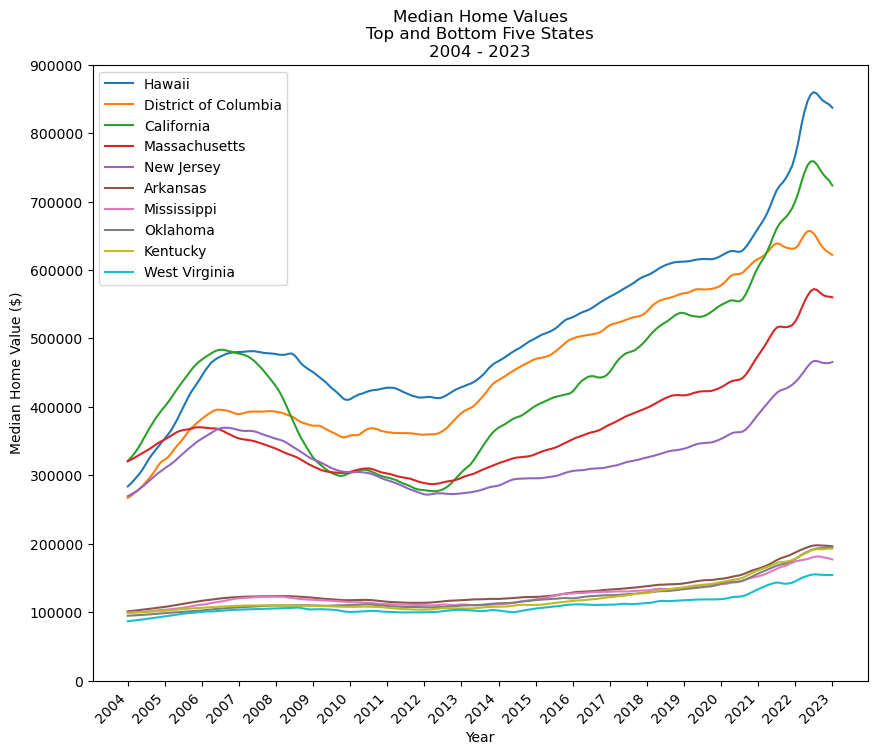

In [854]:
graph_list_hv = median_home_value_means_top_5_list.append(median_home_value_means_bottom_5_list)

plt.figure(figsize=(10,8))
plt.plot(home_value_df.loc[:,graph_list_hv])
fig_xticks = range(0, len(home_value_df), 12)
fig_labels = home_value_df['Year'][::12]
plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
plt.legend(graph_list_hv)
plt.title(f"Median Home Values\nTop and Bottom Five States\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
plt.xlabel("Year")
plt.ylabel("Median Home Value ($)")
plt.ylim(0, 900000)

figure_count = save_figure(figure_count, "Images","Home_Values_Top_Bottom_2004-2023.png")
plt.show();

In [855]:
# Get the top and bottom 5 states in median income, as of the end time period
#last_inc_data_point_df = median_income_df.iloc[-1,start_column:end_column]
#top_5_inc_srs = last_inc_data_point_df.sort_values(ascending=False)[0:5]
#top_5_inc_list = top_5_inc_srs.index
#print(f"Top 5: {top_5_inc_list}")

#bottom_5_inc_srs = last_inc_data_point_df.sort_values(ascending=True)[0:5]
#bottom_5_inc_list = bottom_5_inc_srs.index
#print(f"Bottom 5: {bottom_5_inc_list}")

Saving to: Images/d03_Median_Income_Top_Bottom_2004-2023.png


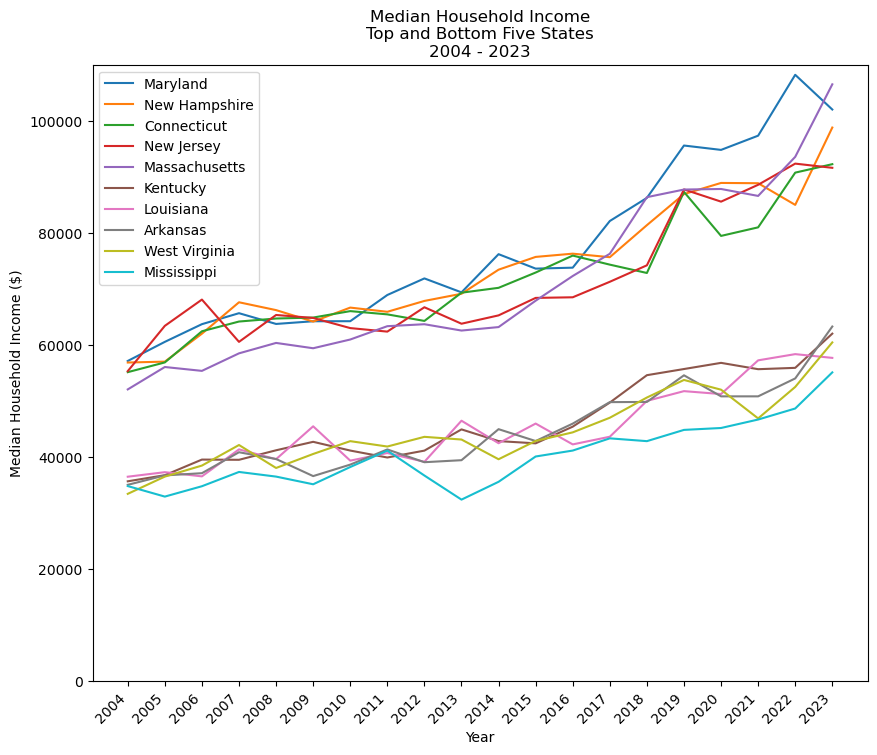

In [856]:
graph_list_inc = median_income_means_top_5_list.append(median_income_means_bottom_5_list)

plt.figure(figsize=(10,8))
plt.plot(median_income_df.loc[:,graph_list_inc])
fig_xticks = range(0, len(median_income_df), 1)
fig_labels = median_income_df['Year'][::1]
plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
plt.legend(graph_list_inc)
plt.title(f"Median Household Income\nTop and Bottom Five States\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
plt.xlabel("Year")
plt.ylabel("Median Household Income ($)")
plt.ylim(0,110000)

figure_count = save_figure(figure_count, "Images","Median_Income_Top_Bottom_2004-2023.png")
plt.show();

In [857]:
#def graph_home_value_vs_income(state):
#    
#    fig01, = plt.plot(home_value_df.loc[:,state], label="Median Home Value")
#    fig02, = plt.plot(median_income_df.loc[:,state], label="Median Income")
#    fig_xticks = range(0, len(home_value_df), 12)
#    fig_labels = home_value_df['Year'][::12]
#    plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
#    plt.title(f"Median Home Value and Median Income\n{state}\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
#    plt.ylim((0, 900000))
#    plt.xlabel("Year")
#    plt.ylabel("U.S. Dollars ($)")
#    plt.legend()

In [ ]:
def graph_home_value_vs_income(states):
    line_style_mhv = ['m-', 'c-', 'r-', 'b-']
    line_style_mhi = ['m--', 'c--', 'r--', 'b--']
    state_list = ""

    for i in range(len(states)):
        fig01, = plt.plot(home_value_df.loc[:,states[i]], line_style_mhv[i], label=f"{states[i]} Home Value")
        fig02, = plt.plot(median_income_df.loc[:,states[i]], line_style_mhi[i], label=f"{states[i]} Income")
        state_list += f"{states[i]}"
        if i < (len(states) - 2):
            state_list += ", "
        elif i < (len(states) - 1):
            state_list += " & "
    fig_xticks = range(0, len(home_value_df), 12)
    fig_labels = home_value_df['Year'][::12]
    plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
    plt.title(f"Median Home Value and Median Household Income\n{state_list}\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
    plt.ylim((0, 900000))
    plt.xlabel("Year")
    plt.ylabel("U.S. Dollars ($)")
    plt.legend()

In [894]:
print(home_value_df[["Hawaii", "West Virginia"]].tail())
print(median_income_df[["Hawaii", "West Virginia"]].tail())
print(home_value_df[["Hawaii", "West Virginia"]].iloc[-1:,0] - home_value_df[["Hawaii", "West Virginia"]].iloc[-1:,1])
print(median_income_df[["Hawaii", "West Virginia"]].iloc[-1:,0] - median_income_df[["Hawaii", "West Virginia"]].iloc[-1:,1])

                Hawaii  West Virginia
Date                                 
2022-09  852199.768748  154831.425791
2022-10  847486.679549  154627.641532
2022-11  844390.587397  154434.551756
2022-12  841842.810167  154661.824257
2023-01  837184.468957  154388.745757
          Hawaii  West Virginia
Date                           
2019-01  88010.0        53710.0
2020-01  80830.0        51970.0
2021-01  82200.0        46840.0
2022-01  91010.0        52460.0
2023-01  97360.0        60410.0
Date
2023-01    682795.7232
dtype: float64
Date
2023-01    36950.0
dtype: float64


Saving to: Images/d04_States_HI_WV_2004-2023.png


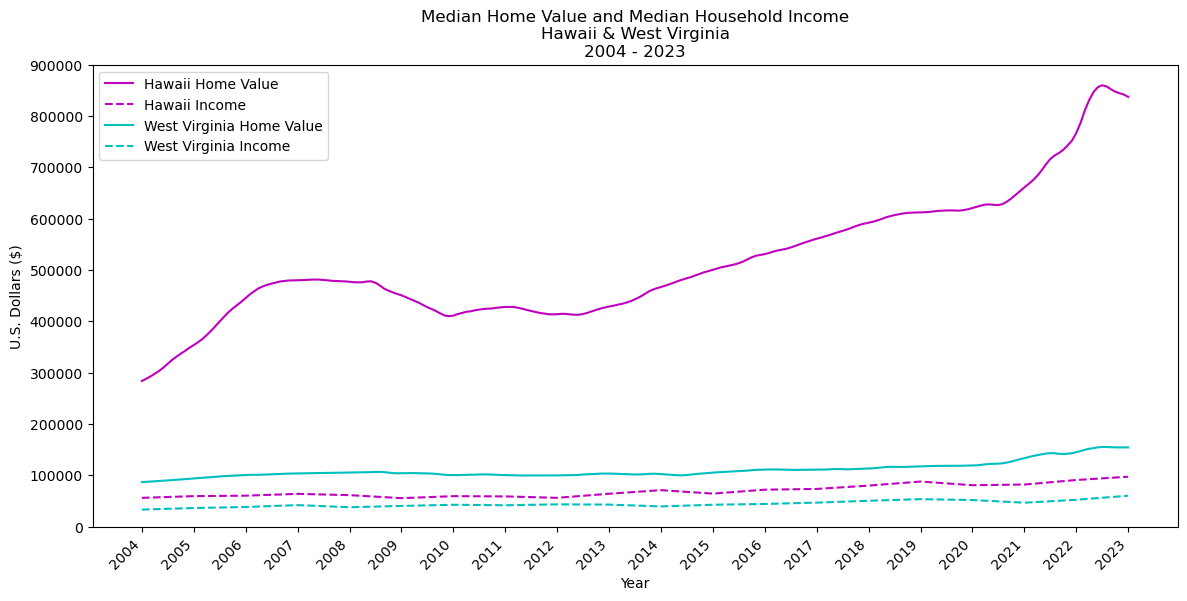

In [ ]:
plt.figure(figsize=(14,6))
graph_home_value_vs_income(["Hawaii", "West Virginia"])

figure_count = save_figure(figure_count, "Images","States_HI_WV_2004-2023.png")

In [860]:
#plt.figure(figsize=(14,6))
#plt.subplot(1, 2, 1)
#graph_home_value_vs_income("Hawaii")
#
#plt.subplot(1, 2, 2)
#graph_home_value_vs_income("West Virginia")
#
#figure_count = save_figure(figure_count, "Images","States_HI_WV_2004-2023.png")

Saving to: Images/d05_States_MD_MS_2004-2023.png


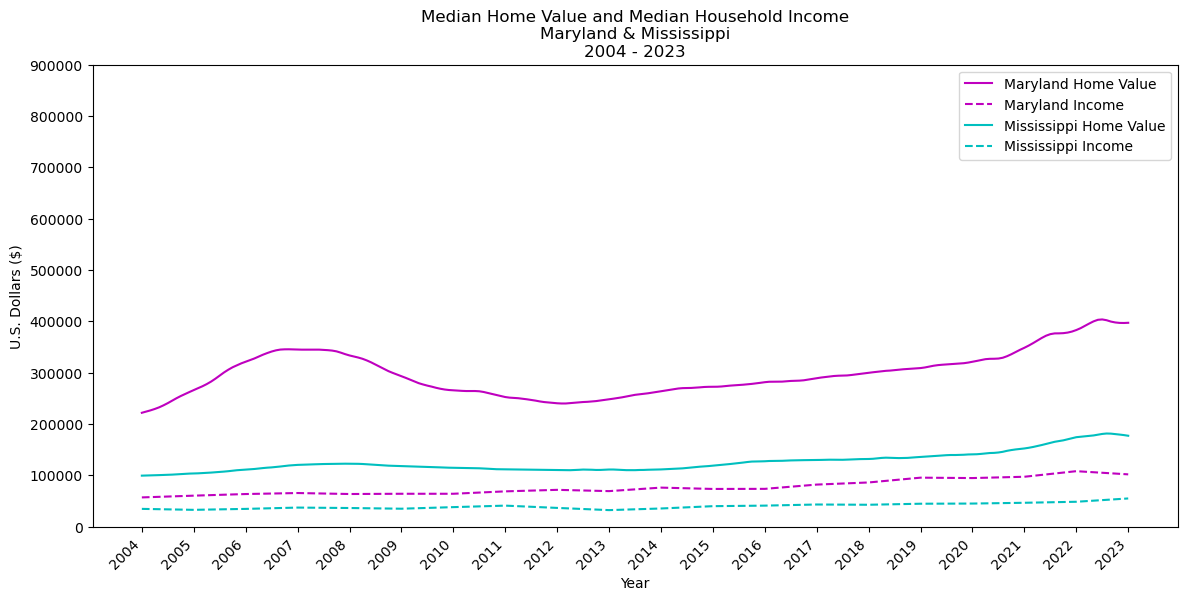

In [861]:
plt.figure(figsize=(14,6))
graph_home_value_vs_income(["Maryland", "Mississippi"])

figure_count = save_figure(figure_count, "Images","States_MD_MS_2004-2023.png")

In [862]:
# Function to create Linear Regression plots
def LinRegressPlot(x_vals, y_vals, txt_loc_tuple, txt_size=16, marker_color='#0485d1', labels=["","",""]):
    plt.scatter(x_vals, y_vals, marker='o', color=marker_color, alpha=1, edgecolors='black')
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_vals, y_vals)
    
    r_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
    r_vals = (slope * x_vals) + intercept
    plt.plot(x_vals, r_vals, 'r')
    plt.annotate(r_line, txt_loc_tuple, color='r', size=txt_size)
    plt.title(labels[0])
    plt.xlabel(labels[1])
    plt.ylabel(labels[2])
    
    return rvalue**2

Saving to: Images/d06_LinearRegression_Home_Values_Income_2004.png


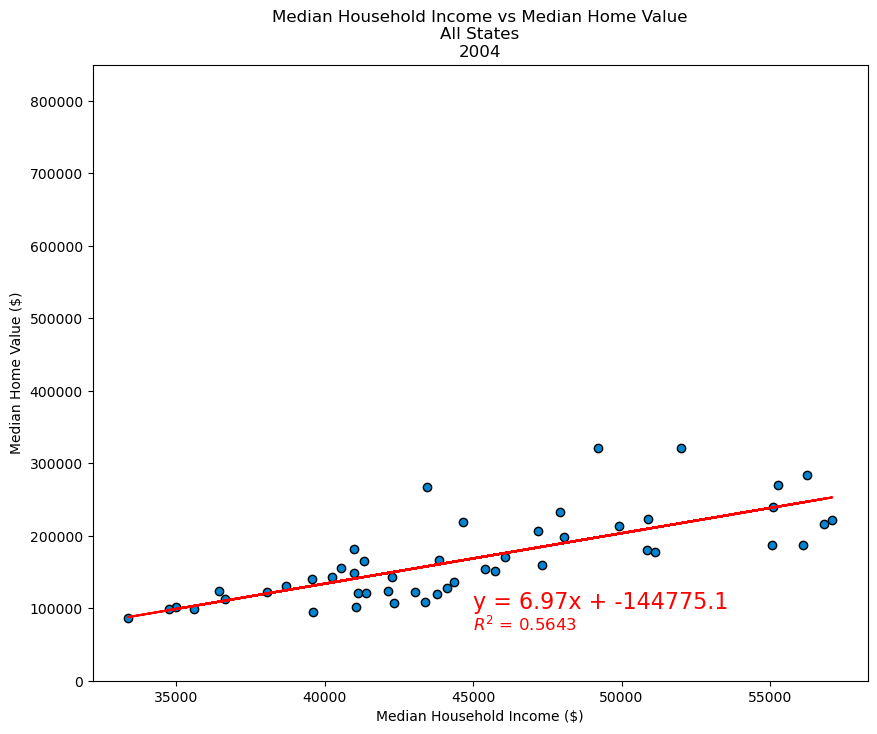

In [863]:
labels = [f"Median Household Income vs Median Home Value\nAll States\n{home_value_df.iloc[0,0]}",
          "Median Household Income ($)",
          "Median Home Value ($)"]

plt.figure(figsize=(10,8))

x_vals = median_income_df.iloc[0:1,start_column:end_column]
y_vals = home_value_df.iloc[0:1,start_column:end_column]

# Drop NA's
drop_list = y_vals.columns[y_vals.isna().any()]
x_vals = x_vals.drop(drop_list, axis=1)
y_vals = y_vals.drop(drop_list, axis=1)

r2 = LinRegressPlot(x_vals.squeeze(), y_vals.squeeze(), (45000,100000), labels=labels)
plt.annotate(f"$R^2$ = {round(r2,4)}", (45000, 70000), color='r', size=12)

plt.ylim(0, 850000)

figure_count = save_figure(figure_count, "Images","LinearRegression_Home_Values_Income_2004.png")
plt.show();

Saving to: Images/d07_LinearRegression_Home_Values_Income_2023.png


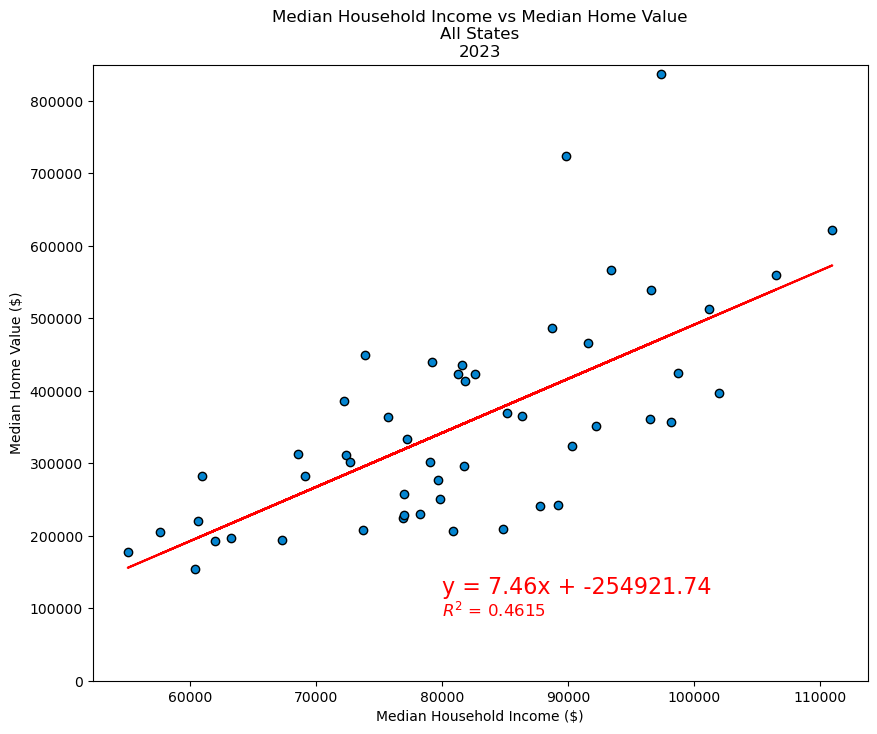

In [864]:
labels = [f"Median Household Income vs Median Home Value\nAll States\n{home_value_df.iloc[-1,0]}",
          "Median Household Income ($)",
          "Median Home Value ($)"]

plt.figure(figsize=(10,8))
x_vals = median_income_df.iloc[-1:,start_column:end_column]
y_vals = home_value_df.iloc[-1:,start_column:end_column]

r2 = LinRegressPlot(x_vals.squeeze(), y_vals.squeeze(), (80000,120000), labels=labels)
plt.annotate(f"$R^2$ = {round(r2,4)}", (80000, 90000), color='r', size=12)

plt.ylim(0, 850000)

figure_count = save_figure(figure_count, "Images","LinearRegression_Home_Values_Income_2023.png")
plt.show();

In [865]:
# Calculate home value : income ratios 2004

home_value_income_ratio_2004 = pd.DataFrame()
home_value_income_ratio_2004.index = inc_column_pair[start_column:end_column][1]
home_value_income_ratio_2004.index.name = "State"
home_value_income_ratio_2004['Median Income'] = median_income_df.iloc[0:1,start_column:end_column].squeeze()
home_value_income_ratio_2004['Median Home Value'] = round(home_value_df.iloc[0:1,start_column:end_column].squeeze(),0)
home_value_income_ratio_2004['Ratio'] = home_value_income_ratio_2004['Median Income'] / home_value_income_ratio_2004['Median Home Value']
home_value_income_ratio_2004 = states_df.merge(home_value_income_ratio_2004, on="State")

home_value_income_ratio_2004 = home_value_income_ratio_2004.rename({"District of Columbia": "D.C."})
ratio_top_5_2004 = home_value_income_ratio_2004.sort_values('Ratio', ascending=False).iloc[0:5,:]
ratio_bottom_5_2004 = home_value_income_ratio_2004.sort_values('Ratio', ascending=True).iloc[0:5,:]
ratio_bottom_5_2004 = ratio_bottom_5_2004.sort_values("Ratio", ascending=False)

#home_value_income_ratio_2004.head(60)

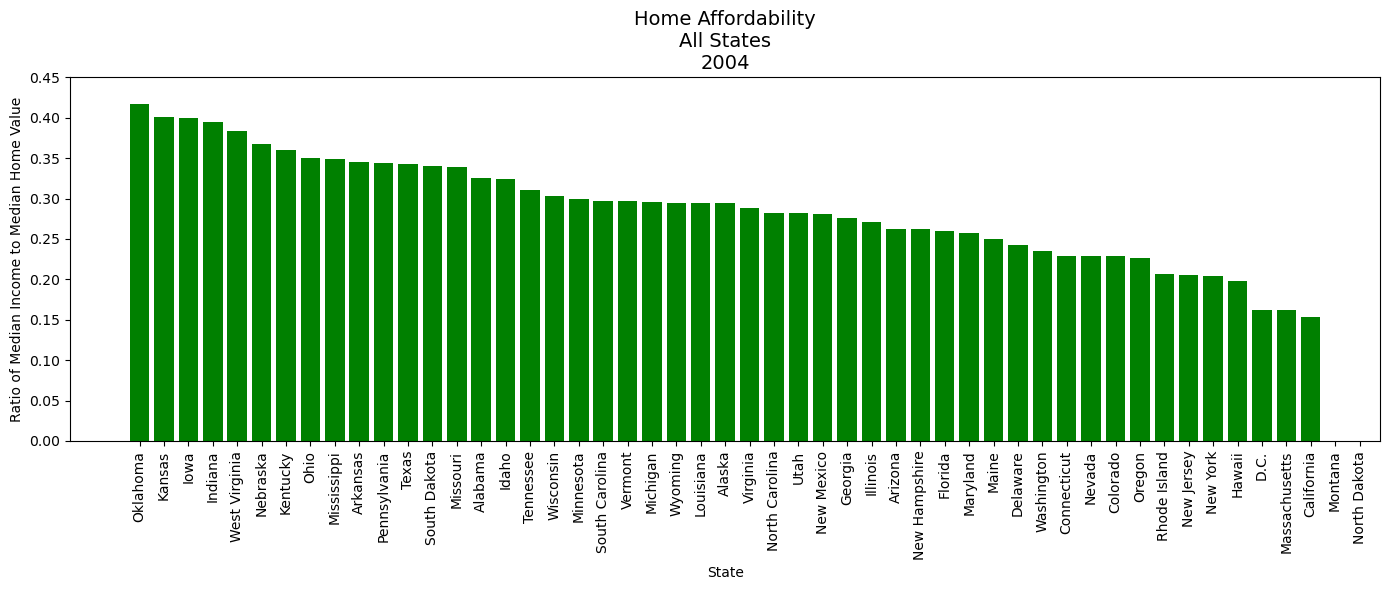

In [866]:
plt.figure(figsize=(14,6))
home_value_income_ratio_2004 = home_value_income_ratio_2004.sort_values('Ratio', ascending=False)
plt.bar(home_value_income_ratio_2004.index, home_value_income_ratio_2004['Ratio'], color='green')
plt.xticks(home_value_income_ratio_2004.index, rotation=90)
plt.ylim((0,0.45))
plt.title(f"Home Affordability\nAll States\n{median_income_df.iloc[0:1,0].iloc[0]}", size=14)
plt.xlabel("State")
plt.ylabel("Ratio of Median Income to Median Home Value")
plt.tight_layout()
#figure_count = save_figure(figure_count, "Images","Home_Affordability_All_2004.png")
plt.show();

Saving to: Images/d08_Home_Affordability_Top_Bottom_2004.png


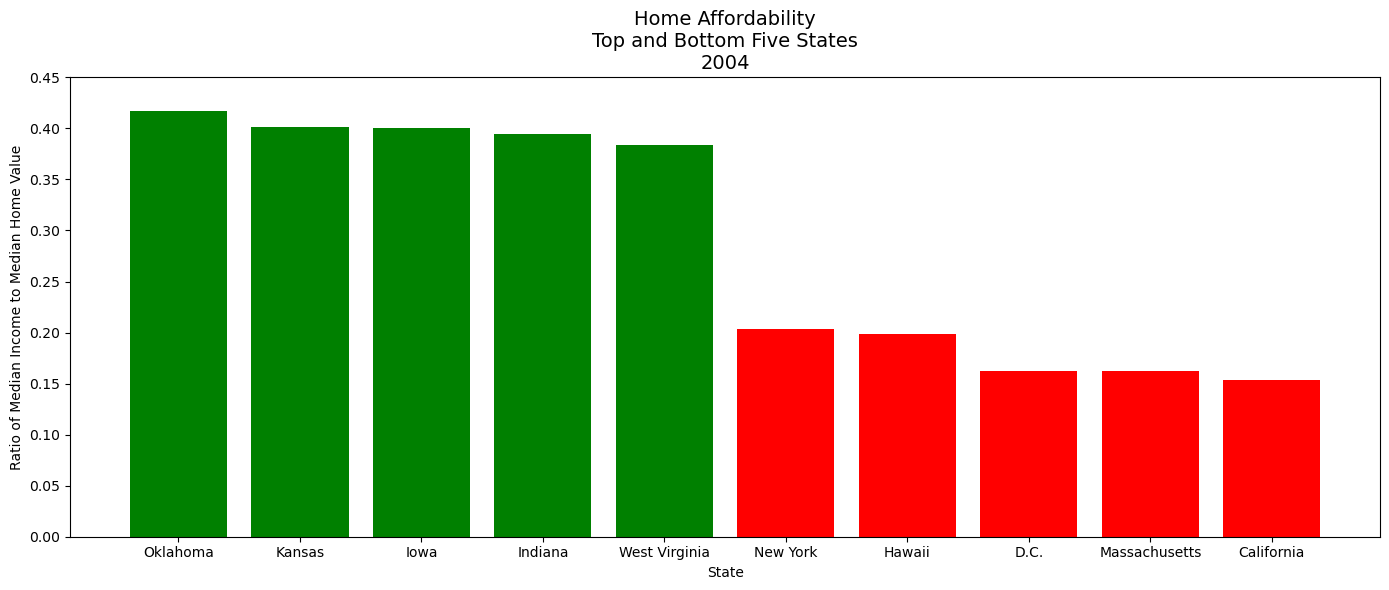

In [867]:
plt.figure(figsize=(14,6))
plt.bar(ratio_top_5_2004.index, ratio_top_5_2004['Ratio'], color='green')
plt.bar(ratio_bottom_5_2004.index, ratio_bottom_5_2004['Ratio'], color='red')
plt.ylim((0,0.45))
plt.title(f"Home Affordability\nTop and Bottom Five States\n{median_income_df.iloc[0:1,0].iloc[0]}", size=14)
plt.xlabel("State")
plt.ylabel("Ratio of Median Income to Median Home Value")
plt.tight_layout()
figure_count = save_figure(figure_count, "Images","Home_Affordability_Top_Bottom_2004.png")
plt.show();

In [868]:
# Calculate home value : income ratios 2023

home_value_income_ratio_2023 = pd.DataFrame()
home_value_income_ratio_2023.index = inc_column_pair[start_column:end_column][1]
home_value_income_ratio_2023.index.name = "State"
home_value_income_ratio_2023['Median Income'] = median_income_df.iloc[-1:,start_column:end_column].squeeze()
home_value_income_ratio_2023['Median Home Value'] = round(home_value_df.iloc[-1:,start_column:end_column].squeeze(),0)
home_value_income_ratio_2023['Ratio'] = home_value_income_ratio_2023['Median Income'] / home_value_income_ratio_2023['Median Home Value']
home_value_income_ratio_2023 = states_df.merge(home_value_income_ratio_2023, on="State")

home_value_income_ratio_2023 = home_value_income_ratio_2023.rename({"District of Columbia": "D.C."})
ratio_top_5_2023 = home_value_income_ratio_2023.sort_values('Ratio', ascending=False).iloc[0:5,:]
ratio_bottom_5_2023 = home_value_income_ratio_2023.sort_values('Ratio', ascending=True).iloc[0:5,:]
ratio_bottom_5_2023 = ratio_bottom_5_2023.sort_values("Ratio", ascending=False)

home_value_income_ratio_2023.head(60)


,Code,Lat,Lon,Median Income,Median Home Value,Ratio
State,,,,,,
Alabama,AL,32.806671,-86.791130,60660.0,220040.0,0.275677
Alaska,AK,61.370716,-152.404419,98190.0,356353.0,0.275541
Arizona,AZ,33.729759,-111.431221,82660.0,423639.0,0.195119
Arkansas,AR,34.969704,-92.373123,63250.0,196303.0,0.322206
California,CA,36.116203,-119.681564,89870.0,723543.0,0.124208
Colorado,CO,39.059811,-105.311104,96640.0,538704.0,0.179394
Connecticut,CT,41.597782,-72.755371,92240.0,351396.0,0.262496
Delaware,DE,39.318523,-75.507141,86340.0,365716.0,0.236085
D.C.,DC,38.897438,-77.026817,111000.0,622165.0,0.178409


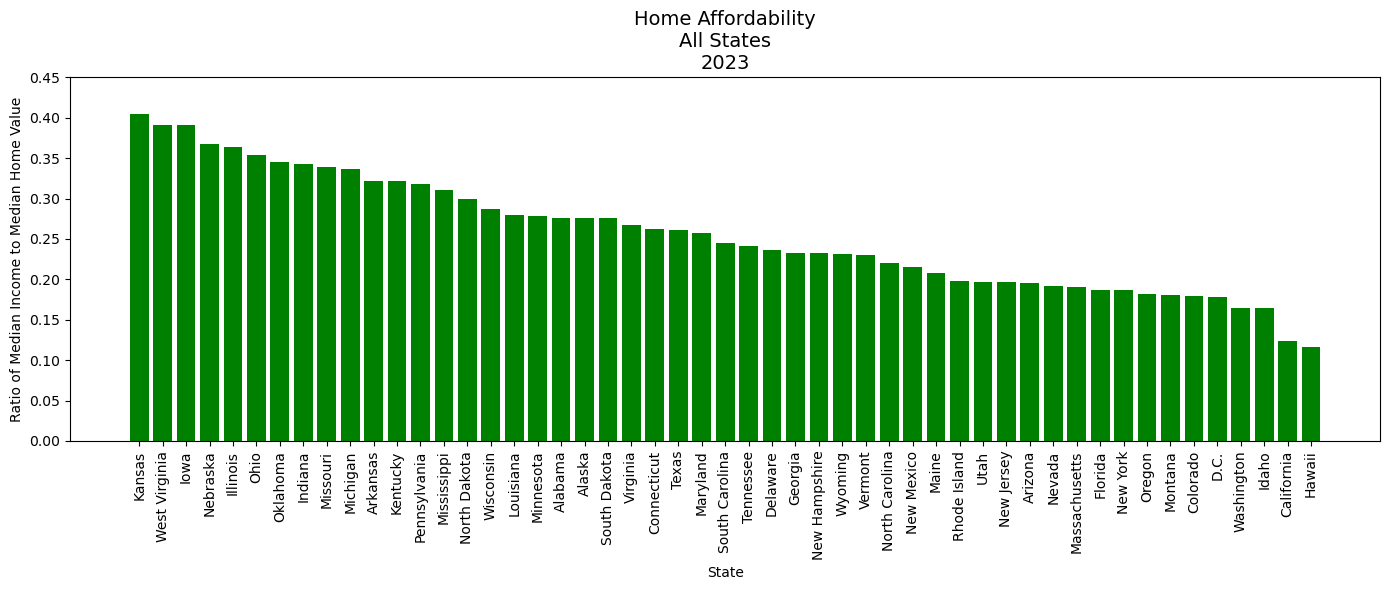

In [869]:
plt.figure(figsize=(14,6))
home_value_income_ratio_2023 = home_value_income_ratio_2023.sort_values('Ratio', ascending=False)
plt.bar(home_value_income_ratio_2023.index, home_value_income_ratio_2023['Ratio'], color='green')
plt.xticks(home_value_income_ratio_2023.index, rotation=90)
plt.ylim((0,0.45))
plt.title(f"Home Affordability\nAll States\n{median_income_df.iloc[-1:,0].iloc[0]}", size=14)
plt.xlabel("State")
plt.ylabel("Ratio of Median Income to Median Home Value")
plt.tight_layout()
#figure_count = save_figure(figure_count, "Images","Home_Affordability_All_2023.png")
plt.show();

Saving to: Images/d09_Home_Affordability_Top_Bottom_2023.png


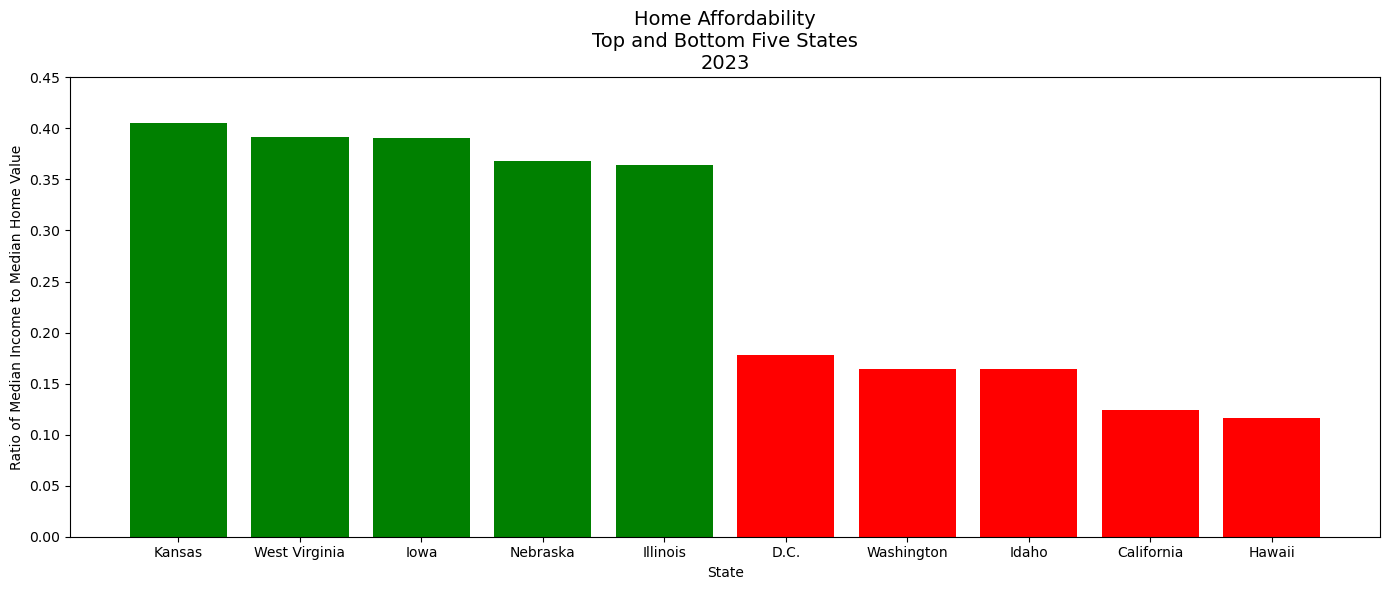

In [870]:
plt.figure(figsize=(14,6))
plt.bar(ratio_top_5_2023.index, ratio_top_5_2023['Ratio'], color='green')
plt.bar(ratio_bottom_5_2023.index, ratio_bottom_5_2023['Ratio'], color='red')
plt.ylim((0,0.45))
plt.title(f"Home Affordability\nTop and Bottom Five States\n{median_income_df.iloc[-1:,0].iloc[0]}", size=14)
plt.xlabel("State")
plt.ylabel("Ratio of Median Income to Median Home Value")
plt.tight_layout()

figure_count = save_figure(figure_count, "Images","Home_Affordability_Top_Bottom_2023.png")
plt.show();

In [871]:
map_info = home_value_income_ratio_2023.copy()

map_info['Median Home Value ($1000)'] = round(map_info['Median Home Value'] / 1000,0).astype('int')
map_info['Median Income ($1000)'] = round(map_info['Median Income'] / 1000,0).astype('int')

In [872]:
%%capture --no-display

bySize = "Median Home Value ($1000)"
byColor = "Median Income ($1000)"

# Configure the map plot
map_plot_1 = map_info.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    size = bySize,
    color = byColor,
    alpha = 0.65,
    frame_height = 600,
    frame_width = 800,
    title = f"All States & District of Columbia, 2023\nSize by {bySize}\nColor by {byColor}",
    hover_cols = ["State", "Median Home Value ($1000)", "Median Income ($1000)"]
)

# Display the map
map_plot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lon,Lat]   (Median Income ($1000),Median Home Value ($1000),State)

In [873]:
# To use GeoPandas maps:
# conda install geopandas
# pip install pyogrio

# Reference URLs:
# https://geopandas.org/en/stable/docs/user_guide/mapping.html
# https://jcutrer.com/python/learn-geopandas-plotting-usmaps
# https://matplotlib.org/stable/users/explain/colors/colormaps.html


# Map shapefile data:
# https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html
# https://www2.census.gov/geo/tiger/TIGER2024/STATE/

In [874]:
# Read Shapefile data
shapefiles_path = "Data/tl_2024_us_state"
shapefile_shape_path = f"{shapefiles_path}/tl_2024_us_state.shp"
#shapefile_attrib_path = f"{shapefiles_path}/tl_2024_us_state.dbf"
#shapefile_index_path = f"{shapefiles_path}/tl_2024_us_state.shx"

state_shape = geopandas.read_file(shapefile_shape_path)

# Change map projection
state_shape = state_shape.to_crs("EPSG:3395")

In [875]:
# Rename STUSPS column for merging
state_shape = state_shape.rename(columns={"STUSPS": "Code"})

# 2004 data
home_value_income_map_2004 = home_value_income_ratio_2004.reset_index()

# Remove Virgin Islands, Northern Mariana Islands, Guam, American Samoa, & Puerto Rico as they are not in the home value or income data sets
not_mapped = ["VI", "MP", "GU", "AS", "PR"]
for unmap in not_mapped:
    state_shape_2004 = state_shape[state_shape["Code"] != unmap]

# Merge home value and income data with shape data
state_shape_2004 = state_shape_2004.merge(home_value_income_map_2004, on="Code", how="outer")

# 2023 data
home_value_income_map_2023 = home_value_income_ratio_2023.reset_index()

# Remove Virgin Islands, Northern Mariana Islands, Guam, American Samoa, & Puerto Rico as they are not in the home value or income data sets
not_mapped = ["VI", "MP", "GU", "AS", "PR"]
for unmap in not_mapped:
    state_shape_2023 = state_shape[state_shape["Code"] != unmap]

# Merge home value and income data with shape data
state_shape_2023 = state_shape.merge(home_value_income_map_2023, on="Code", how="outer")

Saving to: Images/d10_Map_Home_Affordability_2004.png


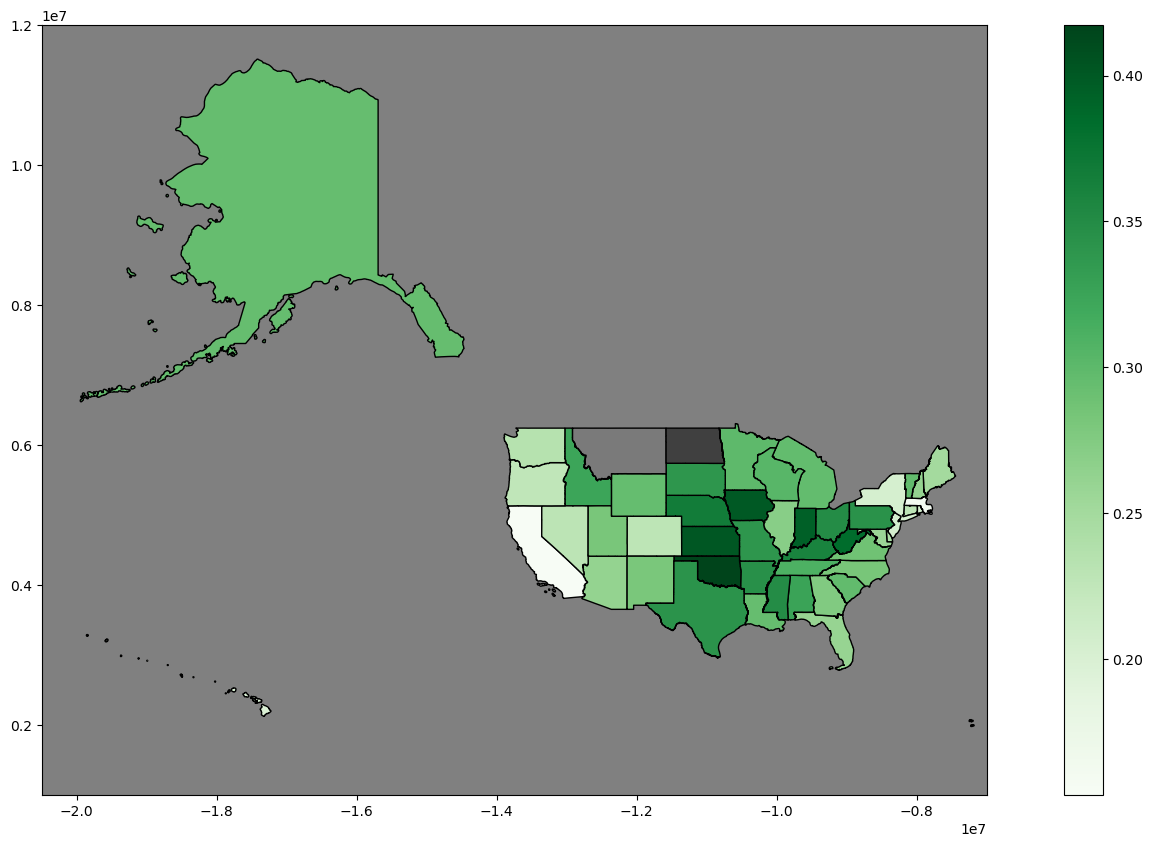

In [876]:
fig, ax = plt.subplots(figsize=(20, 10))
map_affordability_2004 = state_shape_2004.plot(ax=ax, cmap='Greens', column='Ratio', edgecolor='black', figsize=(20,10), legend=True)
map_affordability_2004.set_facecolor('gray')
state_shape_2004[state_shape_2004['Ratio'].isna()].plot(ax=ax, cmap='Grays', edgecolor='black', legend=False)

ax.set_ylim(1000000, 12000000)
ax.set_xlim(-20500000, -7000000)
figure_count = save_figure(figure_count, "Images", "Map_Home_Affordability_2004.png")

Saving to: Images/d11_Map_Home_Affordability_2023.png


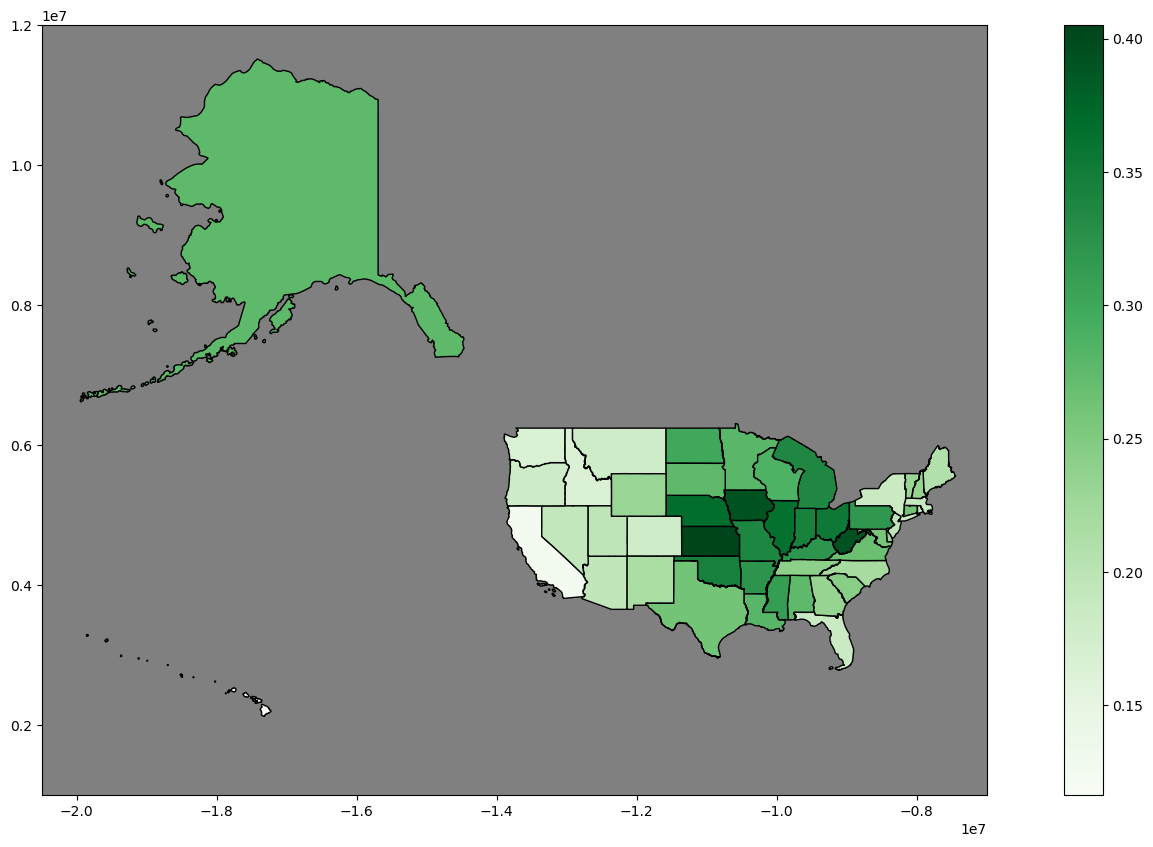

In [877]:
fig, ax = plt.subplots(figsize=(20, 10))
map_contiguous = state_shape_2023.plot(ax=ax, cmap='Greens', column='Ratio', edgecolor='black', figsize=(20,10), legend=True)
map_contiguous.set_facecolor('gray')
ax.set_ylim(1000000, 12000000)
ax.set_xlim(-20500000, -7000000)
figure_count = save_figure(figure_count, "Images", "Map_Home_Affordability_2023.png")

In [878]:
# https://stackoverflow.com/questions/14057007/remove-rows-not-isinx
# Exclude Alaska and Hawaii for better mapping
#contiguous_shape = state_shape_2023[np.logical_not(state_shape_2023["Code"].isin(["AK", "HI"]))]
#map_contiguous = contiguous_shape.plot(cmap='Greens', column='Ratio', edgecolor='black', figsize=(20,10), legend=True)
#map_contiguous.set_facecolor('gray')
#figure_count = save_figure(figure_count, "Images", "Map_Contiguous_Home_Affordability.png")

In [879]:
#alaska_shape_2023 = state_shape_2023[np.logical_not(state_shape["Code"].isin(["HI"]))]
#map_alaska = alaska_shape_2023.plot(cmap='Greens', column='Ratio', edgecolor='black', figsize=(20,10), legend=True)
#map_alaska.set_facecolor('gray')
#figure_count = save_figure(figure_count, "Images", "Map_Alaska_Home_Affordability.png")

In [880]:
#hawaii_shape_2023 = state_shape_2023[np.logical_not(state_shape["Code"].isin(["AK"]))]
#map_hawaii= hawaii_shape_2023.plot(cmap='Greens', column='Ratio', edgecolor='black', figsize=(20,10), legend=True)
#map_hawaii.set_facecolor('gray')
#figure_count = save_figure(figure_count, "Images", "Map_Hawaii_Home_Affordability.png")

Saving to: Images/d12_Map_Home_Affordability_Delta.png


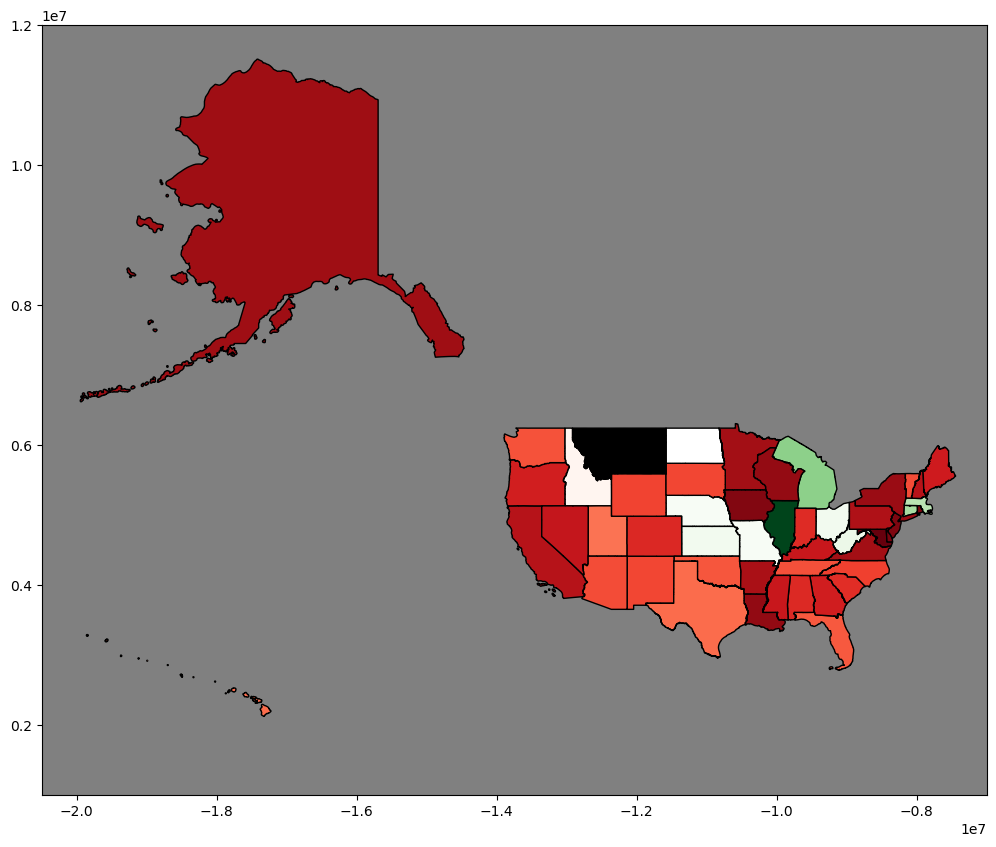

In [881]:
# Calculate ratio difference
ratio_difference = pd.DataFrame({"Code": home_value_income_ratio_2004['Code'], 
                                 "Ratio 2004": home_value_income_ratio_2004['Ratio'],
                                 "Ratio 2023": home_value_income_ratio_2023['Ratio'],
                                 "Ratio Difference": (home_value_income_ratio_2023['Ratio'] - home_value_income_ratio_2004['Ratio'])})
ratio_difference

# Merge home value and income data with shape data
state_shape_diff = state_shape.merge(ratio_difference, on="Code")

#contiguous_shape_diff = state_shape_diff[np.logical_not(state_shape_diff["Code"].isin(["AK", "HI"]))]
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_ylim(1000000, 12000000)
ax.set_xlim(-20500000, -7000000)
fig1 = state_shape_diff[state_shape_diff['Ratio Difference'] >= 0].plot(ax=ax, cmap='Greens', column='Ratio Difference', edgecolor='black', legend=False)
fig2 = state_shape_diff[state_shape_diff['Ratio Difference'] < 0].plot(ax=ax, cmap='Reds', column='Ratio Difference', edgecolor='black', legend=False)
fig3 = state_shape_diff[state_shape_diff['Ratio Difference'].isna()].plot(ax=ax, cmap='Grays', edgecolor='black', legend=False)
fig1.set_facecolor('gray')

figure_count = save_figure(figure_count, "Images", "Map_Home_Affordability_Delta.png")

In [882]:
# Calculate the percent change in affordability
ratio_difference['Percent Change'] = (ratio_difference['Ratio 2023'] / ratio_difference['Ratio 2004']) * 100
ratio_difference.sort_values('Percent Change', ascending=False)


,Code,Ratio 2004,Ratio 2023,Ratio Difference,Percent Change
State,,,,,
Illinois,IL,0.270585,0.363933,0.093349,134.498918
Massachusetts,MA,0.162284,0.190111,0.027828,117.147625
Connecticut,CT,0.229234,0.262496,0.033262,114.510133
Michigan,MI,0.296252,0.336726,0.040474,113.662047
D.C.,DC,0.162631,0.178409,0.015779,109.702194
West Virginia,WV,0.384000,0.391284,0.007284,101.896918
Ohio,OH,0.349931,0.353732,0.003801,101.086215
Kansas,KS,0.401458,0.405131,0.003673,100.914838
Nebraska,NE,0.367418,0.367804,0.000386,100.105128


Saving to: Images/d13_Map_Home_Affordability_Pct_Change.png


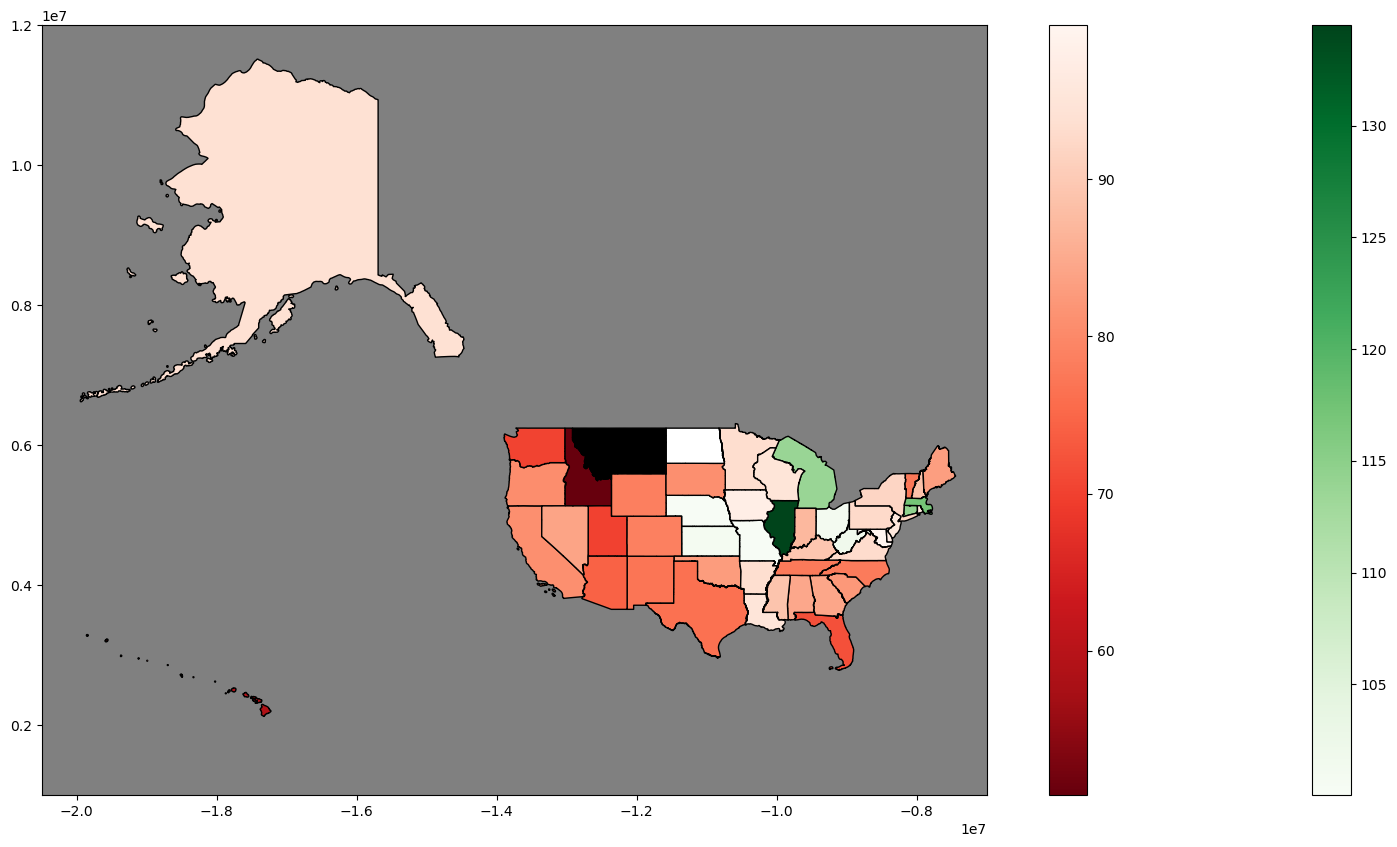

In [883]:
# Merge home value and income data with shape data
state_shape_pct = state_shape.merge(ratio_difference, on="Code")

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_ylim(1000000, 12000000)
ax.set_xlim(-20500000, -7000000)
fig1 = state_shape_pct[state_shape_pct['Percent Change'] >= 100].plot(ax=ax, cmap='Greens', column='Percent Change', edgecolor='black', legend=True)
fig2 = state_shape_pct[state_shape_pct['Percent Change'] < 100].plot(ax=ax, cmap='Reds_r', column='Percent Change', edgecolor='black', legend=True)
fig3 = state_shape_pct[state_shape_pct['Percent Change'].isna()].plot(ax=ax, cmap='Grays', edgecolor='black', legend=False)
fig1.set_facecolor('gray')

figure_count = save_figure(figure_count, "Images", "Map_Home_Affordability_Pct_Change.png")